# 1 Exploratory data analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams['font.size'] = '14'

In [3]:
# Read training and prediction data
train_data = pd.read_csv('train.csv')
pred_x = pd.read_csv('prediction.csv')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232483 entries, 0 to 232482
Data columns (total 22 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   x_0      232483 non-null  int64  
 1   x_1      232483 non-null  int64  
 2   x_2      232483 non-null  float64
 3   x_3      232483 non-null  int64  
 4   x_4      232483 non-null  int64  
 5   x_5      232483 non-null  bool   
 6   x_6      232483 non-null  float64
 7   x_7      232483 non-null  float64
 8   x_8      232483 non-null  float64
 9   x_9      232483 non-null  float64
 10  x_10     232483 non-null  int64  
 11  x_11     232483 non-null  float64
 12  x_12     232483 non-null  float64
 13  x_13     232483 non-null  float64
 14  x_14     232483 non-null  float64
 15  x_15     232483 non-null  float64
 16  x_16     232483 non-null  float64
 17  x_17     232483 non-null  float64
 18  x_18     232483 non-null  float64
 19  x_19     232483 non-null  float64
 20  worker   232483 non-null  

In [6]:
train_data.x_5 = train_data.x_5 * 1
pred_x.x_5 = pred_x.x_5 * 1

In [7]:
# Divide the training data into data sets only containing tasks performed by worker_0 and worker_1
train_data_0 = train_data[train_data["worker"] == "worker_0"]
train_data_1 = train_data[train_data["worker"] == "worker_1"]

In [8]:
# Summary statistics for the entire training data
train_data.describe()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,quality
count,232483.000000,232483.000000,232483.000000,232483.000000,232483.000000,232483.000000,2.324830e+05,232483.000000,232483.000000,232483.000000,...,232483.000000,232483.000000,232483.000000,232483.000000,232483.000000,232483.000000,2.324830e+05,232483.000000,2.324830e+05,232483.000000
mean,7.310784,22.706030,2280.923329,0.017021,329.840031,0.545644,6.601858e+05,2.697156,0.001495,0.000967,...,0.029862,0.000465,0.000275,2.555226,0.001390,0.003715,6.927992e+04,0.028719,4.533310e-04,-0.060719
std,3.983856,9.733159,3408.242562,0.999857,735.758682,0.497913,1.272460e+06,3.218846,0.000972,0.000831,...,0.056070,0.000348,0.003025,3.173949,0.000889,0.002698,2.211334e+05,0.048710,3.308627e-04,0.187602
min,0.000000,3.000000,100.500000,-1.000000,100.000000,0.000000,1.005000e+04,0.000000,0.000000,0.000000,...,0.000006,0.000000,-0.074276,0.010000,0.000002,0.000002,0.000000e+00,0.000014,3.000000e-07,-1.000000
25%,4.000000,20.000000,980.500000,-1.000000,100.000000,0.000000,1.334000e+05,1.254390,0.000821,0.000488,...,0.005445,0.000235,-0.001126,0.988556,0.000764,0.002083,3.763248e+03,0.006044,2.234895e-04,-0.119875
50%,7.000000,30.000000,1641.500000,1.000000,100.000000,1.000000,2.507000e+05,1.839238,0.001309,0.000725,...,0.013514,0.000390,0.000229,1.854901,0.001209,0.003063,1.235694e+04,0.015475,3.742160e-04,-0.027167
75%,11.000000,30.000000,2460.000000,1.000000,300.000000,1.000000,6.072000e+05,2.722157,0.001918,0.001151,...,0.030303,0.000606,0.001612,2.773176,0.001791,0.004508,4.888962e+04,0.031226,5.913195e-04,0.026226
max,13.000000,31.000000,71765.000000,1.000000,50600.000000,1.000000,3.296675e+07,117.854280,0.035978,0.020108,...,1.000000,0.017895,0.076745,124.188380,0.011639,0.073792,1.049743e+07,1.000000,5.942064e-03,1.000000


In [9]:
# Summary statistics for the training data of worker_0
train_data_0.describe()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,quality
count,81127.000000,81127.000000,81127.000000,81127.000000,81127.000000,81127.000000,8.112700e+04,81127.000000,81127.000000,81127.000000,...,81127.000000,81127.000000,81127.000000,81127.000000,81127.000000,81127.000000,8.112700e+04,81127.000000,8.112700e+04,81127.000000
mean,7.307715,22.717850,2294.831822,0.013719,334.648144,0.543567,6.671719e+05,2.746821,0.001519,0.000972,...,0.030344,0.000464,0.000297,2.588784,0.001402,0.003756,7.028574e+04,0.028486,4.568511e-04,-0.066030
std,3.998647,9.743652,3511.343342,0.999912,763.490764,0.498101,1.285771e+06,3.280429,0.000998,0.000838,...,0.059751,0.000344,0.003043,3.251807,0.000896,0.002722,2.269129e+05,0.048140,3.330953e-04,0.218701
min,0.000000,3.000000,100.500000,-1.000000,100.000000,0.000000,1.015000e+04,0.000000,0.000000,0.000000,...,0.000015,0.000000,-0.060598,0.010000,0.000002,0.000004,6.293639e+00,0.000018,9.910000e-07,-1.000000
25%,4.000000,20.000000,977.000000,-1.000000,100.000000,0.000000,1.334500e+05,1.272138,0.000834,0.000488,...,0.005435,0.000236,-0.001132,0.988618,0.000772,0.002100,3.815418e+03,0.006033,2.251310e-04,-0.153610
50%,7.000000,30.000000,1636.500000,1.000000,100.000000,1.000000,2.519000e+05,1.868998,0.001329,0.000728,...,0.013514,0.000391,0.000251,1.862386,0.001220,0.003096,1.253737e+04,0.015370,3.782880e-04,-0.041017
75%,11.000000,30.000000,2464.500000,1.000000,300.000000,1.000000,6.179500e+05,2.758495,0.001956,0.001161,...,0.030303,0.000607,0.001659,2.804147,0.001810,0.004566,4.920233e+04,0.030999,5.959635e-04,0.047192
max,13.000000,31.000000,71170.000000,1.000000,50600.000000,1.000000,3.277725e+07,101.905556,0.035978,0.020108,...,1.000000,0.017895,0.076745,124.188380,0.009887,0.073792,8.337444e+06,0.940790,5.942064e-03,1.000000


In [10]:
# Summary statistics for the training data of worker_1
train_data_1.describe()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19,quality
count,151356.000000,151356.000000,151356.000000,151356.000000,151356.000000,151356.000000,1.513560e+05,151356.000000,151356.000000,151356.000000,...,151356.000000,151356.000000,151356.000000,151356.000000,151356.000000,151356.000000,1.513560e+05,151356.000000,1.513560e+05,151356.000000
mean,7.312429,22.699695,2273.468360,0.018790,327.262877,0.546757,6.564412e+05,2.670536,0.001482,0.000965,...,0.029604,0.000466,0.000263,2.537239,0.001384,0.003694,6.874079e+04,0.028845,4.514442e-04,-0.057872
std,3.975918,9.727556,3351.663151,0.999827,720.444322,0.497811,1.265256e+06,3.185040,0.000957,0.000828,...,0.053993,0.000351,0.003015,3.131283,0.000885,0.002684,2.179714e+05,0.049013,3.296455e-04,0.168520
min,0.000000,3.000000,100.500000,-1.000000,100.000000,0.000000,1.005000e+04,0.000000,0.000000,0.000000,...,0.000006,0.000000,-0.074276,0.010000,0.000002,0.000002,0.000000e+00,0.000014,3.000000e-07,-1.000000
25%,4.000000,20.000000,982.375015,-1.000000,100.000000,0.000000,1.334000e+05,1.246176,0.000815,0.000488,...,0.005448,0.000235,-0.001122,0.988556,0.000759,0.002073,3.737164e+03,0.006050,2.226110e-04,-0.102775
50%,7.000000,30.000000,1644.750000,1.000000,100.000000,1.000000,2.501000e+05,1.823719,0.001298,0.000723,...,0.013605,0.000390,0.000219,1.851840,0.001204,0.003046,1.226526e+04,0.015532,3.722245e-04,-0.022356
75%,11.000000,30.000000,2457.500000,1.000000,300.000000,1.000000,6.010875e+05,2.702740,0.001898,0.001147,...,0.030303,0.000606,0.001588,2.758780,0.001782,0.004474,4.872717e+04,0.031354,5.881633e-04,0.018406
max,13.000000,31.000000,71765.000000,1.000000,39700.000000,1.000000,3.296675e+07,117.854280,0.018240,0.020051,...,0.500000,0.017290,0.069227,114.327705,0.011639,0.071651,1.049743e+07,1.000000,4.409124e-03,1.000000


Text(0.2, 0.5, 'count    81127.000000\nmean        -0.066030\nstd          0.218701\nmin         -1.000000\n25%         -0.153610\n50%         -0.041017\n75%          0.047192\nmax          1.000000')

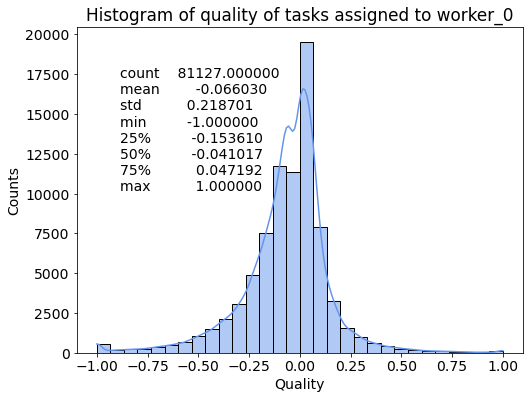

In [11]:
sns.histplot(data = train_data_0, x = 'quality', color = 'cornflowerblue', bins = 30, kde = True)
plt.xlabel('Quality')
plt.ylabel('Counts')
plt.title('Histogram of quality of tasks assigned to worker_0')
plt.figtext(0.2, 0.5, train_data_0['quality'].describe().to_string())

Text(0.2, 0.5, 'count    151356.000000\nmean         -0.057872\nstd           0.168520\nmin          -1.000000\n25%          -0.102775\n50%          -0.022356\n75%           0.018406\nmax           1.000000')

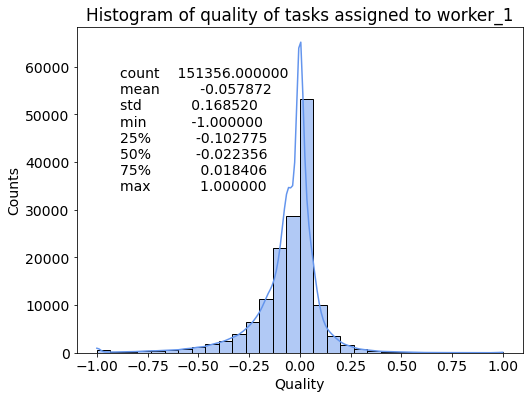

In [12]:
plt.figure(figsize = (8, 6))

sns.histplot(data = train_data_1, x = 'quality', color = 'cornflowerblue', bins = 30, kde = True)
plt.xlabel('Quality')
plt.ylabel('Counts')
plt.title('Histogram of quality of tasks assigned to worker_1')
plt.figtext(0.2, 0.5, train_data_1['quality'].describe().to_string())

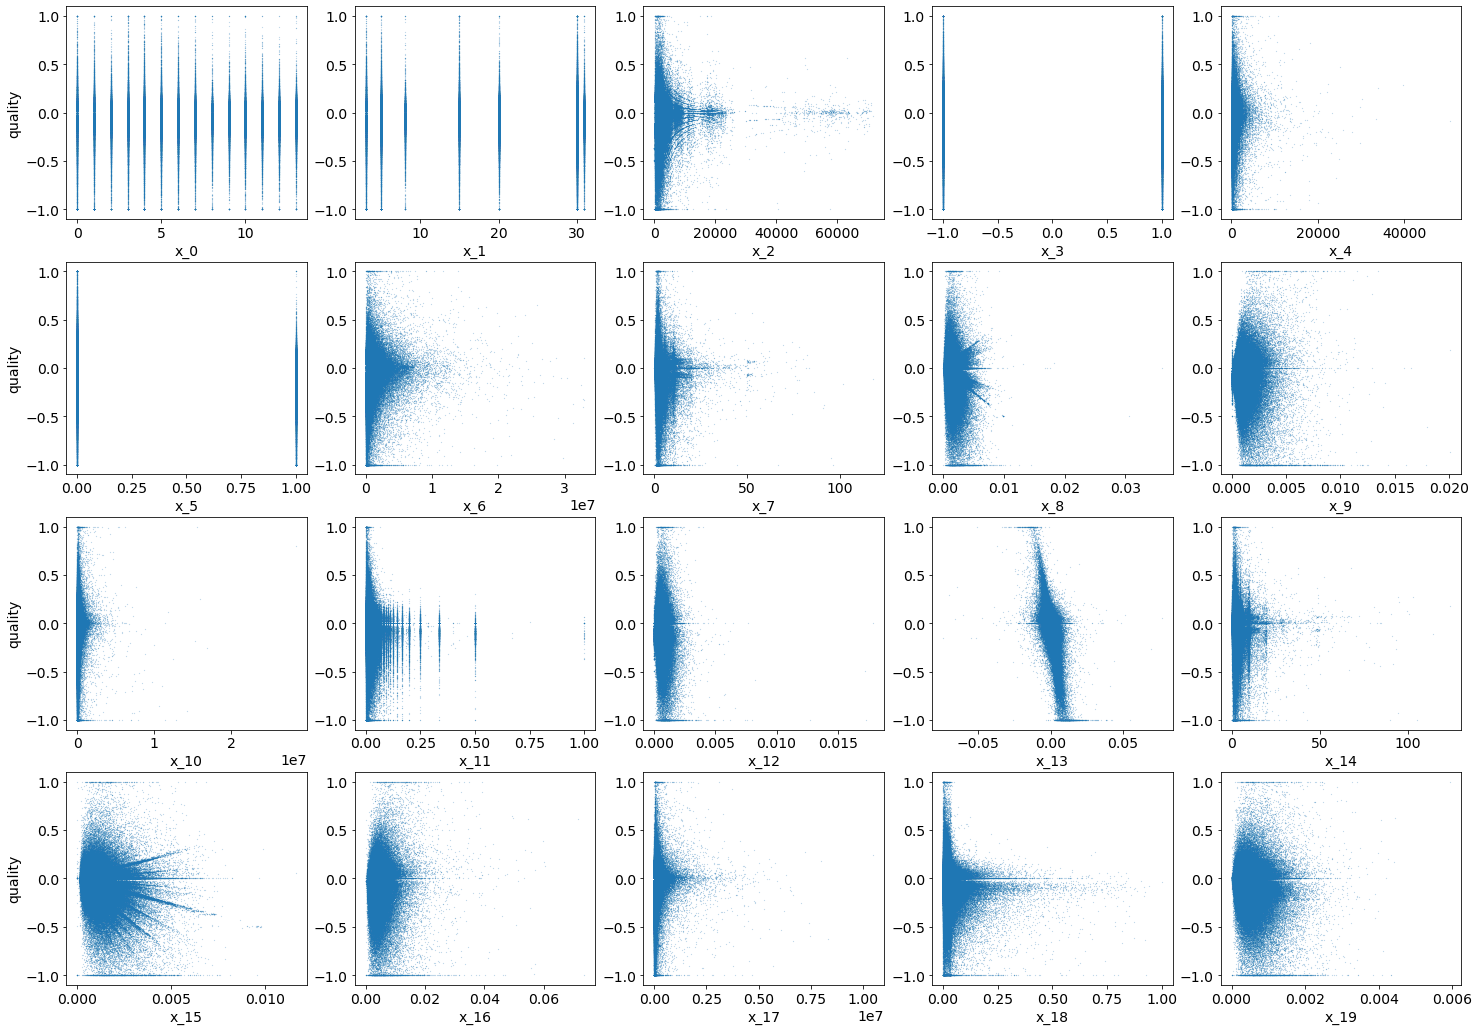

In [13]:
# Scatterplot of the features and the outcome of the training data
fig, ax = plt.subplots(nrows = 4, ncols = 5, figsize = (25, 18))

for i in range(4):
    for j in range(5):
        ax[i,j].scatter(x = train_data.iloc[: , 5*i+j], y = train_data.iloc[: , -1], s = 0.01)
        ax[i,j].set_xlabel(train_data.columns[5*i+j])
        if j % 5 == 0:
            ax[i,j].set_ylabel("quality")

plt.show()

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = train_data.iloc[:, :-2].columns
vif["VIF"] = [variance_inflation_factor(train_data.iloc[:, :-2].values, i) for i in range(train_data.iloc[:, :-2].shape[1])]

np.transpose(vif)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
variables,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19
VIF,5.960345,9.366713,4.857401,1.00466,2.671029,3.012427,3.30671,32.519978,26.447254,5.534491,4.615768,2.294915,7.814954,1.019267,32.794211,26.388057,8.850165,5.057896,2.937149,11.465322


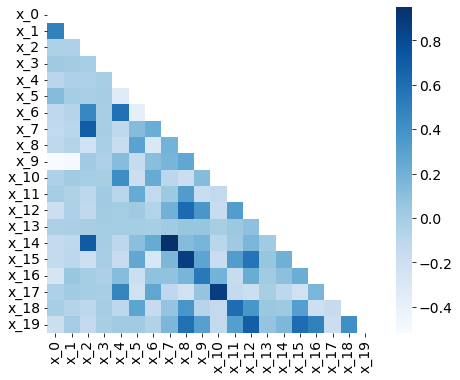

In [15]:
corr = train_data.iloc[:, :-2].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap = "Blues", square = True, mask = mask)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_x_0, test_x_0, train_y_0, test_y_0 = train_test_split(train_data_0.iloc[:, :-2], train_data_0.iloc[: , -1], test_size = 0.3, random_state = 100)
train_x_1, test_x_1, train_y_1, test_y_1 = train_test_split(train_data_1.iloc[:, :-2], train_data_1.iloc[: , -1], test_size = 0.3, random_state = 100)

# 2 Estimation of outcome models

## 2.1 $\epsilon$-support vector regression

In [18]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
svr_x_0 = train_x_0.values
svr_y_0 = train_y_0.values.reshape(-1, 1)
svr_x_1 = train_x_1.values
svr_y_1 = train_y_1.values.reshape(-1, 1)

sc_x_0 = StandardScaler()
sc_y_0 = StandardScaler()
sc_x_1 = StandardScaler()
sc_y_1 = StandardScaler()
svr_x_0 = sc_x_0.fit_transform(svr_x_0)
svr_y_0 = sc_y_0.fit_transform(svr_y_0)
svr_x_1 = sc_x_1.fit_transform(svr_x_1)
svr_y_1 = sc_y_1.fit_transform(svr_y_1)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Hyperparameter tuning via 5-fold cross validation
svr_grid = {'C': [0.1, 0.5, 1, 2, 5], 'epsilon': [0.1, 0.2, 0.5, 1]}
svr_0_cv = SVR()
svr_0_grid = GridSearchCV(svr_0_cv, param_grid = svr_grid, cv = 5, n_jobs = -1)
svr_0_grid.fit(svr_x_0, np.ravel(svr_y_0))

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 5],
                         'epsilon': [0.1, 0.2, 0.5, 1]})

In [21]:
# Best hyperparameters of the model for worker_0
svr_0_grid.best_estimator_

SVR(C=2, epsilon=0.2)

In [13]:
# Fit model for worker_0
svr_0 = SVR(kernel = 'rbf', C = 2.0, epsilon = 0.2)
svr_0.fit(svr_x_0, np.ravel(svr_y_0))

SVR(C=2.0, epsilon=0.2)

In [14]:
pred_y_0 = svr_0.predict(sc_x_0.fit_transform(test_x_0.values))
pred_y_0 = sc_y_0.inverse_transform(pred_y_0.reshape(-1, 1)) 

In [15]:
# Calculate MAE and MSE
errors = abs(np.ravel(pred_y_0) - test_y_0)
print('Mean Absolute Error:', round(np.mean(errors), 3), 'degrees.')
print('Mean Squared Error:', round(np.sqrt(np.mean(errors ** 2)), 3), 'degrees.')

Mean Absolute Error: 0.074 degrees.
Mean Squared Error: 0.114 degrees.


In [23]:
# Hyperparameter tuning via 5-fold cross validation
svr_1_cv = SVR()
svr_1_grid = GridSearchCV(svr_1_cv, param_grid = svr_grid, cv = 5, n_jobs = -1)
svr_1_grid.fit(svr_x_1, np.ravel(svr_y_1))

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 5],
                         'epsilon': [0.1, 0.2, 0.5, 1]})

In [25]:
# Best hyperparameters of the model for worker_1
svr_1_grid.best_estimator_

SVR(C=2, epsilon=0.2)

In [15]:
# Fit model for worker_1
svr_1 = SVR(kernel = 'rbf', C = 2.0, epsilon = 0.2)
svr_1.fit(svr_x_1, np.ravel(svr_y_1))

SVR(C=2.0, epsilon=0.2)

In [16]:
pred_y_1 = svr_1.predict(sc_x_1.fit_transform(test_x_1.values))
pred_y_1 = sc_y_1.inverse_transform(pred_y_1.reshape(-1, 1)) 

In [17]:
# Calculate MAE and MSE
errors = abs(np.ravel(pred_y_1) - test_y_1)
print('Mean Absolute Error:', round(np.mean(errors), 3), 'degrees.')
print('Mean Squared Error:', round(np.sqrt(np.mean(errors ** 2)), 3), 'degrees.')

Mean Absolute Error: 0.073 degrees.
Mean Squared Error: 0.116 degrees.


## 2.2 XGBoost

In [21]:
# Transform the outcome to [0,1]
xgb_y_0 = (train_y_0 + 1)/2
xgb_y_1 = (train_y_1 + 1)/2

In [102]:
from xgboost import XGBRegressor

# Hyperparameter tuning via 5-fold cross validation
xgb_grid = {'max_depth': [100, 200, 300],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 300, 500]}

xgb_0_cv = XGBRegressor(objective = "binary:logistic", random_state  = 100)
xgb_0_grid = GridSearchCV(estimator = xgb_0_cv, param_grid = xgb_grid,
                          scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1)
xgb_0_grid.fit(train_x_0, xgb_y_0)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.05, 'max_depth': 100, 'n_estimators': 300}
Lowest RMSE:  0.05744411179076753


In [107]:
# Best hyperparameters of the model for worker_0
print("Best parameters:", xgb_0_grid.best_params_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 100, 'n_estimators': 300}


In [129]:
# Fit model for worker_0
xgb_0 = XGBRegressor(objective = "binary:logistic", n_estimators = 300, max_depth = 100, learning_rate = 0.05, random_state = 100)
xgb_0.fit(train_x_0, xgb_y_0)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=100, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, objective='binary:logistic', predictor='auto',
             random_state=10, reg_alpha=0, ...)

In [130]:
pred_y_0 = xgb_0.predict(test_x_0)
pred_y_0 = pred_y_0 * 2 - 1

In [131]:
# Calculate MAE and MSE
errors = abs(pred_y_0 - test_y_0)
print('Mean Absolute Error:', round(np.mean(errors), 3), 'degrees.')
print('Mean Squared Error:', round(np.sqrt(np.mean(errors ** 2)), 3), 'degrees.')

Mean Absolute Error: 0.075 degrees.
Mean Squared Error: 0.113 degrees.


In [ ]:
# Hyperparameter tuning via 5-fold cross validation
xgb_1_cv = XGBRegressor(objective = "binary:logistic", random_state  = 100)
xgb_1_grid = GridSearchCV(estimator = xgb_1_cv, param_grid = xgb_grid,
                          scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1)
xgb_1_grid.fit(train_x_1, xgb_y_1)

In [105]:
# Best hyperparameters of the model for worker_1
print("Best parameters:", xgb_1_grid.best_params_)

Best parameters: {'learning_rate': 0.05, 'max_depth': 100, 'n_estimators': 100}


In [141]:
# Fit model for worker_0
xgb_1 = XGBRegressor(objective = "binary:logistic", n_estimators = 100, max_depth = 100, learning_rate = 0.05, random_state = 100)
xgb_1.fit(train_x_1, xgb_y_1)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=100, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='binary:logistic', predictor='auto',
             random_state=100, reg_alpha=0, ...)

In [148]:
pred_y_1 = xgb_1.predict(test_x_1)
pred_y_1 = pred_y_1 * 2 - 1

In [149]:
# Calculate MAE and MSE
errors = abs(pred_y_1 - test_y_1)
print('Mean Absolute Error:', round(np.mean(errors), 3), 'degrees.')
print('Mean Squared Error:', round(np.sqrt(np.mean(errors ** 2)), 3), 'degrees.')

Mean Absolute Error: 0.075 degrees.
Mean Squared Error: 0.116 degrees.


## 2.3 Random forest regression

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter tuning via 5-fold cross validation
warm_start = [True, False]
bootstrap = [True, False]

rf_grid = {'warm_start': warm_start,
'bootstrap': bootstrap}

rf_0_cv = RandomForestRegressor()
rf_0_random = RandomizedSearchCV(estimator = rf_0_cv, param_distributions = rf_grid,
                                 cv = 5, random_state = 100, n_jobs = -1)
rf_0_random.fit(train_x_0, rf_y_0)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'warm_start': [True, False]},
                   random_state=100, verbose=2)

[CV] END ...................bootstrap=True, warm_start=False; total time= 3.2min
[CV] END ...................bootstrap=True, warm_start=False; total time= 3.2min
[CV] END ...................bootstrap=True, warm_start=False; total time= 3.2min
[CV] END ....................bootstrap=True, warm_start=True; total time= 3.3min
[CV] END ...................bootstrap=True, warm_start=False; total time= 3.3min
[CV] END ....................bootstrap=True, warm_start=True; total time= 3.3min
[CV] END ...................bootstrap=False, warm_start=True; total time= 4.8min
[CV] END ..................bootstrap=False, warm_start=False; total time= 4.8min
[CV] END ...................bootstrap=False, warm_start=True; total time= 4.8min
[CV] END ...................bootstrap=False, warm_start=True; total time= 4.8min
[CV] END ...................bootstrap=False, warm_start=True; total time= 4.8min
[CV] END ...................bootstrap=False, warm_start=True; total time= 4.8min
[CV] END ...................

In [37]:
# Best hyperparameters of the model for worker_0
rf_0_random.best_params_

Best Parameters:  {'warm_start': False, 'bootstrap': True}  



/Users/zejian/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/zejian/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


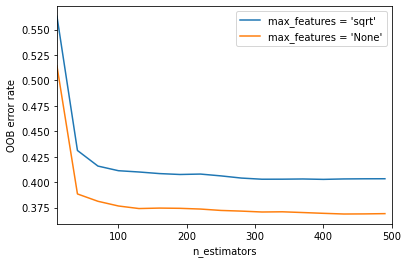

In [40]:
from collections import OrderedDict

# Tuning n_estimators according to OOB errors
oob_rf_0 = [("max_features = 'sqrt'",
            RandomForestRegressor(bootstrap = True, max_features = "sqrt", oob_score = True, random_state = 100),
            ),
            ("max_features = 'None'",
            RandomForestRegressor(bootstrap = True, max_features = None, oob_score = True, random_state = 100),
            )]

dic = OrderedDict((label, []) for label, _ in oob_rf_0)
min_estimators, max_estimators = 10, 500

for label, rf in oob_rf_0:
    for i in range(min_estimators, max_estimators + 1, 30):
        rf.set_params(n_estimators = i)
        rf.fit(train_x_0, rf_y_0)
        oob_error = 1 - rf.oob_score_
        dic[label].append((i, oob_error))

for label, error in dic.items():
    xs, ys = zip(*error)
    plt.plot(xs, ys, label = label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc = "upper right")
plt.show()

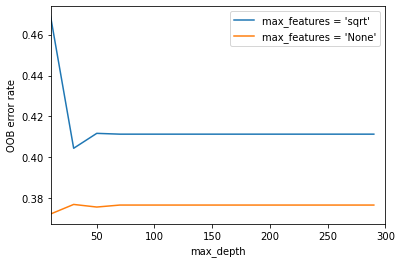

In [42]:
# Tuning max_depth according to OOB errors
dic = OrderedDict((label, []) for label, _ in oob_rf_0)
min_depth, max_depth = 10, 300

for label, rf in oob_rf_0:
    for i in range(min_depth, max_depth + 1, 20):
        rf.set_params(max_depth = i)
        rf.fit(train_x_0, rf_y_0)
        oob_error = 1 - rf.oob_score_
        dic[label].append((i, oob_error))

for label, error in dic.items():
    xs, ys = zip(*error)
    plt.plot(xs, ys, label = label)

plt.xlim(min_depth, max_depth)
plt.xlabel("max_depth")
plt.ylabel("OOB error rate")
plt.legend(loc = "upper right")
plt.show()

In [67]:
# Fit model for worker_0
rf_0 = RandomForestRegressor(n_estimators = 300, max_depth = 100, max_features = 'auto', 
                               bootstrap = True, random_state = 100)

rf_0.fit(train_x_0, train_y_0)

RandomForestRegressor(max_depth=100, n_estimators=300, random_state=100)

In [68]:
pred_y_0 = rf_0.predict(test_x_0)

In [69]:
# Calculate MAE and MSE
errors = abs(np.ravel(pred_y_0) - test_y_0)
print('Mean Absolute Error:', round(np.mean(errors), 3), 'degrees.')
print('Mean Squared Error:', round(np.sqrt(np.mean(errors ** 2)), 3), 'degrees.')

Mean Absolute Error: 0.072 degrees.
Mean Squared Error: 0.109 degrees.


In [36]:
# Hyperparameter tuning via 5-fold cross validation
rf_1_cv = RandomForestRegressor()
rf_1_random = RandomizedSearchCV(estimator = rf_1_cv, param_distributions = rf_grid,
                                 cv = 5, random_state = 100, n_jobs = -1)
rf_1_random.fit(train_x_1, rf_y_1)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/zejian/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ....................bootstrap=True, warm_start=True; total time= 8.4min
[CV] END ....................bootstrap=True, warm_start=True; total time= 8.4min
[CV] END ....................bootstrap=True, warm_start=True; total time= 8.4min
[CV] END ...................bootstrap=True, warm_start=False; total time= 8.4min
[CV] END ...................bootstrap=True, warm_start=False; total time= 8.4min
[CV] END ...................bootstrap=False, warm_start=True; total time=11.9min
[CV] END ...................bootstrap=False, warm_start=True; total time=11.9min
[CV] END ...................bootstrap=False, warm_start=True; total time=12.1min
[CV] END ..................bootstrap=False, warm_start=False; total time=12.1min
[CV] END ...................bootstrap=False, warm_start=True; total time=12.1min
[CV] END ...................bootstrap=False, warm_start=True; total time=12.2min
[CV] END ....................bootstrap=True, warm_start=True; total time= 8.4min


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'warm_start': [True, False]},
                   random_state=100, verbose=2)

[CV] END ...................bootstrap=True, warm_start=False; total time= 8.3min
[CV] END ..................bootstrap=False, warm_start=False; total time= 7.6min
[CV] END ...................bootstrap=True, warm_start=False; total time= 8.4min
[CV] END ..................bootstrap=False, warm_start=False; total time= 7.7min
[CV] END ...................bootstrap=True, warm_start=False; total time= 8.4min
[CV] END ..................bootstrap=False, warm_start=False; total time= 7.8min
[CV] END ....................bootstrap=True, warm_start=True; total time= 8.3min
[CV] END ..................bootstrap=False, warm_start=False; total time= 7.9min


In [72]:
# Best hyperparameters of the model for worker_1
rf_1_random.best_params_

Best Parameters:  {'warm_start': True, 'bootstrap': True}  



/Users/zejian/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/zejian/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


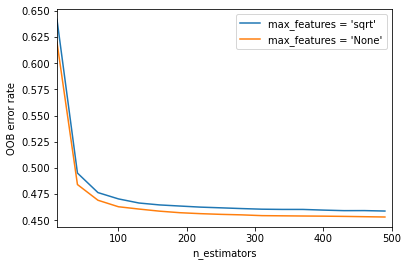

In [66]:
# Tuning n_estimators according to OOB errors

oob_rf_1 = [("max_features = 'sqrt'",
            RandomForestRegressor(max_features = "sqrt", oob_score = True, random_state = 100),
            ),
            ("max_features = 'None'",
            RandomForestRegressor(max_features = None, oob_score = True, random_state = 100),
            )]

dic = OrderedDict((label, []) for label, _ in oob_rf_1)
min_estimators, max_estimators = 10, 500

for label, rf in oob_rf_1:
    for i in range(min_estimators, max_estimators + 1, 30):
        rf.set_params(n_estimators = i)
        rf.fit(train_x_1, train_y_1)
        oob_error = 1 - rf.oob_score_
        dic[label].append((i, oob_error))

for label, error in dic.items():
    xs, ys = zip(*error)
    plt.plot(xs, ys, label = label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc = "upper right")
plt.show()

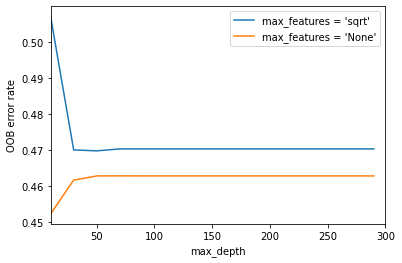

In [88]:
# Tuning max_depth according to OOB errors

dic = OrderedDict((label, []) for label, _ in oob_rf_1)
min_depth, max_depth = 10, 300

for label, rf in oob_rf_1:
    for i in range(min_depth, max_depth + 1, 20):
        rf.set_params(max_depth = i)
        rf.fit(train_x_1, train_y_1)
        oob_error = 1 - rf.oob_score_
        dic[label].append((i, oob_error))

for label, error in dic.items():
    xs, ys = zip(*error)
    plt.plot(xs, ys, label = label)

plt.xlim(min_depth, max_depth)
plt.xlabel("max_depth")
plt.ylabel("OOB error rate")
plt.legend(loc = "upper right")
plt.show()

In [73]:
# Fit model for worker_1
rf_1 = RandomForestRegressor(n_estimators = 500, max_depth = 100, max_features = 'auto', 
                             warm_start = True, bootstrap = True, random_state = 100)

rf_1.fit(train_x_1, train_y_1)

RandomForestRegressor(max_depth=100, n_estimators=500, random_state=100,
                      warm_start=True)

In [74]:
pred_y_1 = rf_1.predict(test_x_1)

In [77]:
# Calculate MAE and MSE
errors = abs(np.ravel(pred_y_1) - test_y_1)
print('Mean Absolute Error:', round(np.mean(errors), 3), 'degrees.')
print('Mean Squared Error:', round(np.sqrt(np.mean(errors ** 2)), 3), 'degrees.')

Mean Absolute Error: 0.074 degrees.
Mean Squared Error: 0.113 degrees.


## 2.4 Random forest quantile regression

In [150]:
# Fit model for worker_0, using the same hyperparameters as for random forest regression
from quantile_forest import RandomForestQuantileRegressor

qrf_0 = RandomForestQuantileRegressor(n_estimators = 300, max_depth = 100, max_features = 'auto', 
                                      bootstrap = True, random_state = 100)
qrf_0.fit(train_x_0, train_y_0)

RandomForestQuantileRegressor(max_depth=100, max_features='auto',
                              n_estimators=300, random_state=100)

In [151]:
pred_y_0 = qrf_0.predict(test_x_0, quantiles = [0.025, 0.5, 0.975])

In [152]:
# Calculate MAE and MSE
errors = abs(np.ravel([x[1] for x in pred_y_0]) - test_y_0)
print('Mean Absolute Error:', round(np.mean(errors), 3), 'degrees.')
print('Mean Squared Error:', round(np.sqrt(np.mean(errors ** 2)), 3), 'degrees.')

Mean Absolute Error: 0.071 degrees.
Mean Squared Error: 0.111 degrees.


In [25]:
# Fit model for worker_1, using the same hyperparameters as for random forest regression
qrf_1 = RandomForestQuantileRegressor(n_estimators = 300, max_depth = 100, max_features = 'auto', 
                                      warm_start = True, bootstrap = True, random_state = 100)
qrf_1.fit(train_x_1, train_y_1)

RandomForestQuantileRegressor(max_depth=100, max_features='auto',
                              n_estimators=300, random_state=100,
                              warm_start=True)

In [26]:
pred_y_1 = qrf_1.predict(test_x_1, quantiles = [0.025, 0.5, 0.975])

In [27]:
# Calculate MAE and MSE
errors = abs(np.ravel([x[1] for x in pred_y_1]) - test_y_1)
print('Mean Absolute Error:', round(np.mean(errors), 3), 'degrees.')
print('Mean Squared Error:', round(np.sqrt(np.mean(errors ** 2)), 3), 'degrees.')

Mean Absolute Error: 0.07 degrees.
Mean Squared Error: 0.116 degrees.


# 3 Prediction and uncerntainty quantification

In [17]:
# Train the model for worker_0 using the entire training data
from quantile_forest import RandomForestQuantileRegressor

qrf_0 = RandomForestQuantileRegressor(n_estimators = 300, max_depth = 100, max_features = 'auto', 
                                      bootstrap = True, random_state = 100)
qrf_0.fit(train_data_0.iloc[:, :-2], train_data_0.iloc[: , -1])

RandomForestQuantileRegressor(max_depth=100, max_features='auto',
                              n_estimators=300, random_state=100)

In [18]:
# Calculate the quantile estimates
pred_y_0 = qrf_0.predict(pred_x, quantiles = [0.025, 0.5, 0.975])

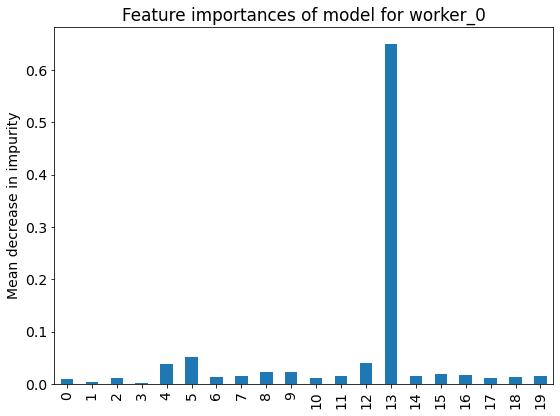

In [21]:
# Calculate feature importance
importance_0 = pd.Series(qrf_0.feature_importances_)
fig, ax = plt.subplots()
importance_0.plot.bar(ax = ax)
ax.set_title("Feature importances of model for worker_0")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [18]:
# Train the model for worker_1 using the entire training data
qrf_1 = RandomForestQuantileRegressor(n_estimators = 300, max_depth = 100, max_features = 'auto', 
                                      bootstrap = True, random_state = 100)
qrf_1.fit(train_data_1.iloc[:, :-2], train_data_1.iloc[: , -1])

RandomForestQuantileRegressor(max_depth=100, max_features='auto',
                              n_estimators=300, random_state=100)

In [19]:
# Calculate the quantile estimates
pred_y_1 = qrf_1.predict(pred_x, quantiles = [0.025, 0.5, 0.975])

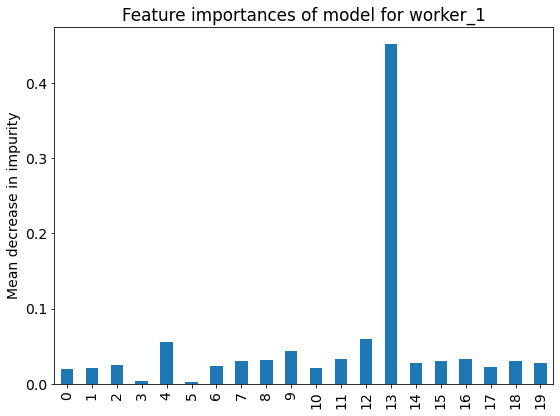

In [20]:
# Calculate feature importance
importance_1 = pd.Series(qrf_1.feature_importances_)
fig, ax = plt.subplots()
importance_1.plot.bar(ax = ax)
ax.set_title("Feature importances of model for worker_1")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [34]:
pred_y_0_l = np.transpose(pred_y_0)[0]
pred_y_0_m = np.transpose(pred_y_0)[1]
pred_y_0_u = np.transpose(pred_y_0)[2]

pred_y_1_l = np.transpose(pred_y_1)[0]
pred_y_1_m = np.transpose(pred_y_1)[1]
pred_y_1_u = np.transpose(pred_y_1)[2]

In [35]:
# Calculate the predicted quality
pred_y = np.maximum(pred_y_0_m, pred_y_1_m)

In [36]:
# Assign tasks to workers
pred_worker = ['worker_0' if x >= y else "worker_1" for x, y in zip(pred_y_0_m, pred_y_1_m)]

In [37]:
# Calculate the interval estimates for quality based on assignments
pred_ci = np.transpose([[pred_y_0_l[i], pred_y_0_u[i]] if pred_worker[i] == 'worker_0' else [pred_y_1_l[i], pred_y_1_u[i]] for i in range(len(pred_worker))])

In [38]:
pred_df = pd.DataFrame({'worker': pred_worker, 'quality': pred_y, 'lower': pred_ci[0], 'upper': pred_ci[1]})

In [39]:
pred_df.to_csv('pred_df.csv')

In [40]:
# Summary for the predictions
pred_df.describe()

,quality,lower,upper
count,85216.000000,85216.000000,85216.000000
mean,-0.031693,-0.242536,0.103705
std,0.145801,0.215752,0.126451
min,-1.000000,-1.000000,-1.000000
25%,-0.080581,-0.324550,0.041736
50%,-0.013302,-0.197311,0.074569
75%,0.022878,-0.113037,0.128708
max,1.000000,1.000000,1.000000
